
<h1 style="text-align: center; background-color : #4535C1; color : white ; padding : 20px ; margin:20px ; border-radius : 15px ">Credit Score Classification</h1>


![](https://assets-global.website-files.com/62696952f4d25f803562df93/6509d587b10f565bbd5a71e8_Low%20Credit%20Score.webp)

## ***About Dataset***

> `This project focuses on credit classification. The main objective is to develop a predictive model to categorize credit applicants into different risk levels. By analyzing various features and historical data of applicants, the model aims to assist financial institutions in evaluating credit applications more effectively. The classification goal is to categorize credit scores into three main groups: Standard, Poor, and Good. The project aims to improve the efficiency and accuracy of the credit approval process, reduce default risks, and optimize the overall credit management strategy.`

## ***Columns Discreption***

> * `ID: Unique identifier for each record in the dataset.`

> * ` Customer_ID: Unique identifier for each customer.`

> * ` Month: Month of the data record.`

> * ` Name: Customer's name.`

> * ` Age: Age of the customer.`

> * ` SSN: Social Security Number or a unique identification number.`

> * ` Occupation: Customer's occupation or job title.`

> * ` Annual_Income: Annual income of the customer.`

> * ` Monthly_Inhand_Salary: Net monthly income available to the customer.`

> * ` Num_Bank_Accounts: Number of bank accounts the customer holds.`

> * ` Num_Credit_Card: Number of credit cards owned by the customer.`

> * ` Interest_Rate: Interest rate associated with financial transactions.`

> * ` Num_of_Loan: Number of loans the customer has.`

> * ` Type_of_Loan: Type or category of the loan.`

> * ` Delay_from_due_date: Delay in payment from the due date.`

> * ` Num_of_Delayed_Payment: Number of delayed payments.`

> * ` Changed_Credit_Limit: Any recent changes in the customer's credit limit.`

> * ` Num_Credit_Inquiries: Number of credit inquiries made by the customer.`

> * ` Credit_Mix: Variety of credit types in the customer's financial profile.`

> * ` Outstanding_Debt: Total outstanding debt of the customer.`

> * ` Credit_Utilization_Ratio: Ratio of credit used to credit available.`

> * ` Credit_History_Age: Age of the customer's credit history.`

> * ` Payment_of_Min_Amount: Payment behavior regarding the minimum amount due.`

> * ` Total_EMI_per_month: Total Equated Monthly Installments paid by the customer.`

> * ` Amount_invested_monthly: Amount invested by the customer monthly.`

> * ` Payment_Behaviour: General behavior regarding payments.`

> * ` Monthly_Balance: Monthly balance in the customer's financial accounts.`

> * ` Credit_Score: Numerical representation of the customer's creditworthiness.`

### `Importing Libraries`

In [1]:
## most important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
# split the dataset
from sklearn.model_selection import train_test_split


# preprossing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , LabelEncoder , OrdinalEncoder
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from datasist.structdata import detect_outliers
from sklearn.model_selection import cross_val_score, cross_val_predict
from imblearn.over_sampling import SMOTE


# Models
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier , BaggingClassifier , GradientBoostingClassifier , RandomForestClassifier , VotingClassifier
from sklearn.multiclass import OneVsOneClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Metrix 
from sklearn.metrics import accuracy_score , classification_report , precision_score , recall_score , confusion_matrix

# Tuning
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

### `Load the Data` 

In [2]:
df_train = pd.read_csv('train.csv' , low_memory=False)
df_test = pd.read_csv('test.csv')
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


 ### `Exploratory Data Analysis (EDA)`

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [4]:
df_train['Annual_Income'][10]

'34847.84_'

In [5]:
df_train['Num_of_Loan'][37]

'0_'

In [6]:
df_train['Num_of_Delayed_Payment'][6]

'8_'

* > `comment : It seems that there is some problems in some numeric features that some values ends with '_' so we fix it`

### `Fix numeric columns`

In [7]:
def clean_and_convert(value):
    value_str = str(value).strip('_')
    if value_str == '':
        return np.nan
    try:
        return float(value_str)
    except ValueError:
        return np.nan

cols_to_be_fixed = ['Age','Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

for col in cols_to_be_fixed:
    df_train[col] = df_train[col].apply(clean_and_convert)
    df_test[col] = df_test[col].apply(clean_and_convert)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [9]:
df_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,110.649700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,3.009960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,686.244717,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,62.647879,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [10]:
for col in df_train[['Age','Num_Bank_Accounts','Num_of_Loan']]:
    df_train[col]=df_train[col].apply(lambda x : abs(x) if x < 0 else x )
    df_test[col]=df_test[col].apply(lambda x : abs(x) if x < 0 else x )

In [11]:
df_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,119.509700,1.764157e+05,4194.170850,17.091700,22.47443,72.466040,10.761960,21.068780,30.923342,10.389025,27.754251,1426.220376,32.285173,1403.118217,637.412998,-3.036437e+22
std,684.757313,1.429618e+06,3183.686167,117.404773,129.05741,466.422621,61.789933,14.860104,226.031892,6.789496,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,25.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700922e+02
50%,34.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367192e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.702202e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [12]:
df_train[df_train['Age'] > 100]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
56,0x1656,CUS_0x5407,January,Annk,7580.0,500-92-6408,Media_Manager,34081.38,NaN,8,...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor
113,0x16ab,CUS_0xff4,February,NaN,500.0,655-05-7666,Entrepreneur,25546.26,NaN,8,...,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.323232,Low_spent_Small_value_payments,129.933631,Standard
122,0x16b8,CUS_0x33d2,March,Chalmersa,181.0,965-46-2491,Scientist,31993.78,2942.148333,6,...,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.257089,Low_spent_Small_value_payments,274.816447,Standard
219,0x1749,CUS_0x3edc,April,Williamso,995.0,663-16-3845,Accountant,43070.24,3622.186667,3,...,Standard,1233.10,24.331772,19 Years and 5 Months,Yes,30.576085,74.920375,High_spent_Medium_value_payments,506.722207,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,0x25f6f,CUS_0x1619,February,Phil Wahbao,2263.0,683-59-7399,Media_Manager,20059.98,1523.665000,8,...,Good,909.01,25.982154,16 Years and 4 Months,No,45.076827,74.713580,High_spent_Small_value_payments,292.576093,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,500.0,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.076293,Low_spent_Large_value_payments,337.130290,Standard
99950,0x25fa4,CUS_0x51b3,July,Ryana,1342.0,837-85-9800,Media_Manager,59146.36,4908.863333,3,...,_,418.03,38.199635,20 Years and 7 Months,No,26.778419,502.376320,Low_spent_Small_value_payments,251.731594,Standard
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,500.0,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.193919,High_spent_Large_value_payments,520.662207,Standard


In [13]:
df_train.drop(df_train[df_train['Age'] > 100].index , inplace = True)

In [14]:
df_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,97224.000000,9.722400e+04,82627.000000,97224.000000,97224.000000,97224.000000,97224.000000,97224.000000,90400.000000,95187.000000,95318.000000,97224.000000,97224.000000,97224.000000,92880.000000,9.604500e+04
mean,33.323274,1.768414e+05,4195.049948,17.128538,22.447503,72.593259,10.713507,21.079199,30.853805,10.389471,27.853585,1426.288628,32.284832,1396.541267,636.362616,-3.123536e+22
std,10.778909,1.432682e+06,3182.903382,117.687045,128.848573,467.279983,61.375653,14.858237,225.319273,6.790566,193.574120,1155.436436,5.117826,8279.887837,2040.539802,3.226596e+24
min,14.000000,7.005930e+03,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.480000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,1.946292e+04,1626.594167,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.340000,3.000000,566.050000,28.052588,30.338701,74.531330,2.700832e+02
50%,33.000000,3.757918e+04,3095.978333,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.080000,32.306296,69.272824,136.013159,3.366478e+02
75%,42.000000,7.281540e+04,5957.715000,7.000000,7.000000,20.000000,6.000000,28.000000,18.000000,14.860000,9.000000,1945.680000,36.499460,161.405543,266.070982,4.699438e+02
max,100.000000,2.419806e+07,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


`Drop useless columns`

In [15]:
df_train.drop(['ID','Customer_ID','Name','SSN','Type_of_Loan','Credit_History_Age'],axis =1 , inplace =True)

In [16]:
df_test.drop(['ID','Customer_ID','Name','SSN','Type_of_Loan','Credit_History_Age'],axis =1 , inplace =True)

In [17]:
(df_train.isna().sum()/df_train.shape[0])*100

Month                        0.000000
Age                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.013783
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.018843
Changed_Credit_Limit         2.095162
Num_Credit_Inquiries         1.960421
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.468033
Payment_Behaviour            0.000000
Monthly_Balance              1.212664
Credit_Score                 0.000000
dtype: float64

* > `comment : It Seems that the dataset contains 100000 instances and about 15% of dataset of monthly inhand salary and 11% for type of leon is null values`

In [18]:
num_cols = df_train.select_dtypes(include=['int64','int32','float64','float32'])
category_cols = df_train.select_dtypes(exclude=['int64','int32','float64','float32'])

In [19]:
for col in category_cols.columns:
    print(f'{col} :  ')
    print('*' * 90)
    print(df_train[col].value_counts())
    print('\n')

Month :  
******************************************************************************************
Month
August      12181
March       12169
July        12168
May         12164
June        12162
April       12134
January     12125
February    12121
Name: count, dtype: int64


Occupation :  
******************************************************************************************
Occupation
_______          6873
Lawyer           6389
Architect        6175
Engineer         6172
Scientist        6113
Accountant       6110
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6031
Entrepreneur     6015
Doctor           5916
Journalist       5906
Manager          5807
Musician         5760
Writer           5741
Name: count, dtype: int64


Credit_Mix :  
******************************************************************************************
Credit_Mix
Standard    35517
Good        23614
_           19633
Bad         18460
Name: count, dtype: int64


Payment

### `Fix categorical columns`

* > `Occupation`

In [20]:
df_train[df_train['Occupation']=='_______']

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,January,28.0,_______,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
16,January,34.0,_______,143162.64,12187.220000,1,5,8,3.0,5,...,3.0,Good,1303.01,28.616735,No,246.992319,168.413703,!@9#%8,1043.315978,Good
18,March,34.0,_______,143162.64,NaN,1,5,8,3.0,8,...,NaN,Good,1303.01,26.519815,No,246.992319,10000.000000,High_spent_Small_value_payments,715.741367,Good
20,May,34.0,_______,143162.64,12187.220000,1,5,8,3.0,10,...,3.0,Good,1303.01,31.376150,No,246.992319,430.947528,Low_spent_Large_value_payments,810.782153,Good
29,June,55.0,_______,30689.89,2612.490833,2,5,4,1.0,5,...,4.0,_,632.46,27.445422,No,16.415452,84.952848,High_spent_Small_value_payments,419.880784,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99912,January,54.0,_______,20059.98,1523.665000,8,5,12,4.0,25,...,3.0,Good,909.01,30.568185,No,6980.000000,151.214086,Low_spent_Medium_value_payments,236.075587,Poor
99920,January,37.0,_______,139664.96,11777.746667,3,6,12,4.0,14,...,8.0,_,365.66,31.043048,Yes,423.731016,282.782346,High_spent_Large_value_payments,711.261305,Standard
99935,August,38.0,_______,15319.65,1460.637500,6,7,15,4.0,54,...,6.0,Bad,1453.61,34.557510,Yes,28.182033,191.877779,Low_spent_Small_value_payments,216.003938,Poor
99943,August,48.0,_______,22620.79,NaN,6,2,9,0.0,27,...,2.0,_,642.46,34.026427,No,0.000000,205.217280,Low_spent_Small_value_payments,256.989303,Poor


In [21]:
df_train['Occupation']= df_train['Occupation'].apply(lambda x : 'Other' if x == '_______' else x)
df_test['Occupation']= df_test['Occupation'].apply(lambda x : 'Other' if x == '_______' else x)

In [22]:
df_train['Occupation'].value_counts()

Occupation
Other            6873
Lawyer           6389
Architect        6175
Engineer         6172
Scientist        6113
Accountant       6110
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6031
Entrepreneur     6015
Doctor           5916
Journalist       5906
Manager          5807
Musician         5760
Writer           5741
Name: count, dtype: int64

* > `Credit_Mix`

In [23]:
pd.DataFrame(df_train.groupby('Credit_Mix')['Credit_Score'].value_counts())

count
Credit_Mix Credit_Score       
Bad        Poor          11085
           Standard       7093
           Good            282
Good       Good          11489
           Standard       8363
           Poor           3762
Standard   Standard      25871
           Poor           7647
           Good           1999
_          Standard      10397
           Poor           5711
           Good           3525

In [24]:
df_train['Credit_Mix']= df_train['Credit_Mix'].apply(lambda x : 'Standard' if x == '_' else x)
df_test['Credit_Mix']= df_test['Credit_Mix'].apply(lambda x : 'Standard' if x == '_' else x)

In [25]:
df_train['Credit_Mix'].value_counts()

Credit_Mix
Standard    55150
Good        23614
Bad         18460
Name: count, dtype: int64

* > `Payment_Behaviour`

In [26]:
df_train['Payment_Behaviour']= df_train['Payment_Behaviour'].apply(lambda x : 'Low_spent_Small_value_payments' if x == '!@9#%8' else x)
df_test['Payment_Behaviour']= df_test['Payment_Behaviour'].apply(lambda x : 'Low_spent_Small_value_payments' if x == '!@9#%8' else x)

In [27]:
df_train['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      32216
High_spent_Medium_value_payments    17040
Low_spent_Medium_value_payments     13475
High_spent_Large_value_payments     13332
High_spent_Small_value_payments     11033
Low_spent_Large_value_payments      10128
Name: count, dtype: int64

* > `Payment_of_Min_Amount`

In [28]:
df_train['Payment_of_Min_Amount']= df_train['Payment_of_Min_Amount'].apply(lambda x : 'No' if x == 'NM' else x)
df_test['Payment_of_Min_Amount']= df_test['Payment_of_Min_Amount'].apply(lambda x : 'No' if x == 'NM' else x)

In [29]:
df_train['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    50911
No     46313
Name: count, dtype: int64

In [30]:
df_test['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    26158
No     23842
Name: count, dtype: int64

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  object 
 1   Age                       50000 non-null  float64
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  float64
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  float64
 9   Delay_from_due_date       50000 non-null  int64  
 10  Num_of_Delayed_Payment    46502 non-null  float64
 11  Changed_Credit_Limit      48941 non-null  float64
 12  Num_Credit_Inquiries      48965 non-null  float64
 13  Credit_Mix                50000 non-null  object 
 14  Outsta

### `Univariate Analysis`

In [32]:
df_train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [33]:
df_good = df_train[df_train['Credit_Score'] == 'Good']
df_bad = df_train[df_train['Credit_Score'] == 'Poor']

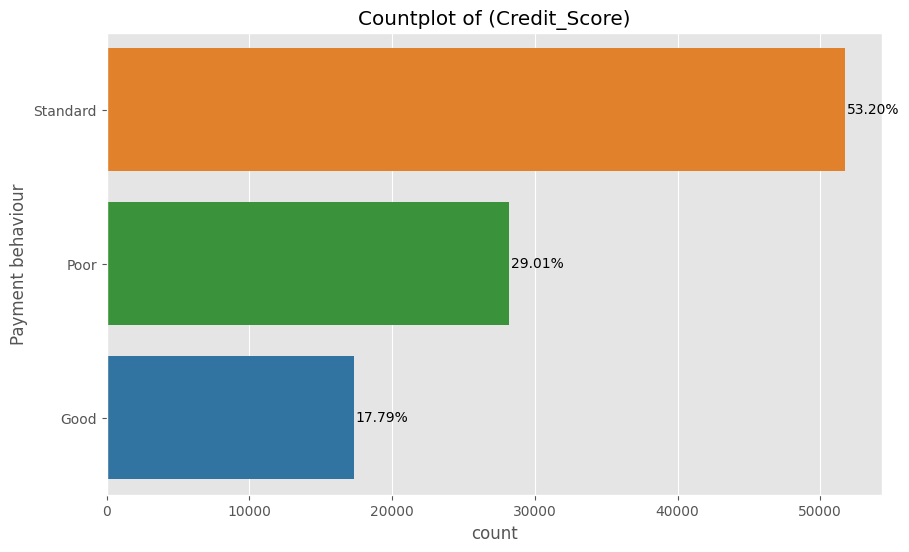

In [34]:
credit_score_values = df_train['Credit_Score'].value_counts()


plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, y='Credit_Score', palette='tab10', order=credit_score_values.index , hue ='Credit_Score' , legend = False)
plt.title("Countplot of (Credit_Score)")
plt.ylabel("Payment behaviour")


total = len(df_train)
for i in range(credit_score_values.shape[0]):
    count = credit_score_values.iloc[i]
    percentage = '{:.2f}%'.format(100 * count / total)
    x = count + 2000  
    y = i 
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()


* > `comment : The most credit score in the dataset appears to be a standard with a percentile of 53.71 % ` 

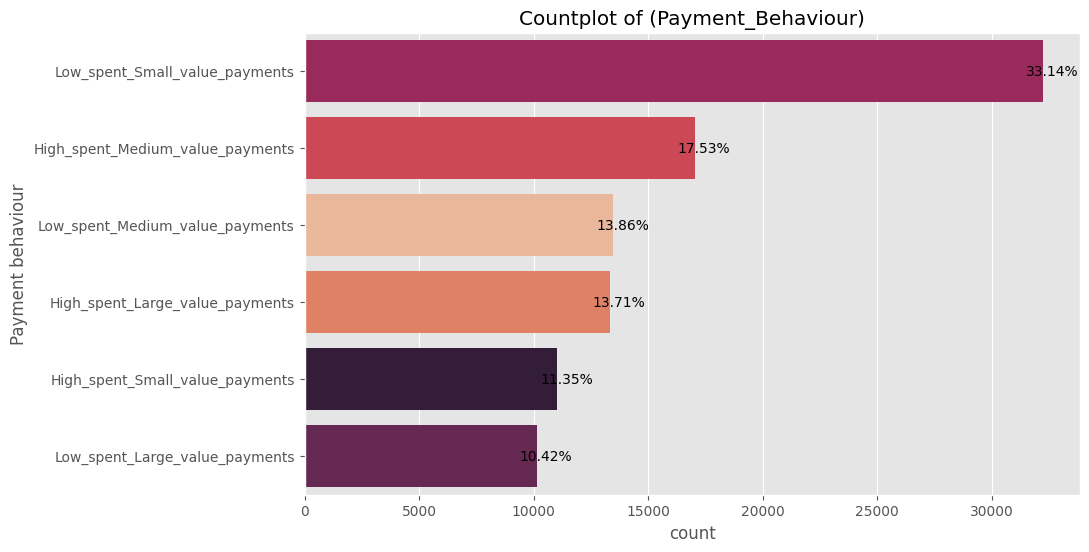

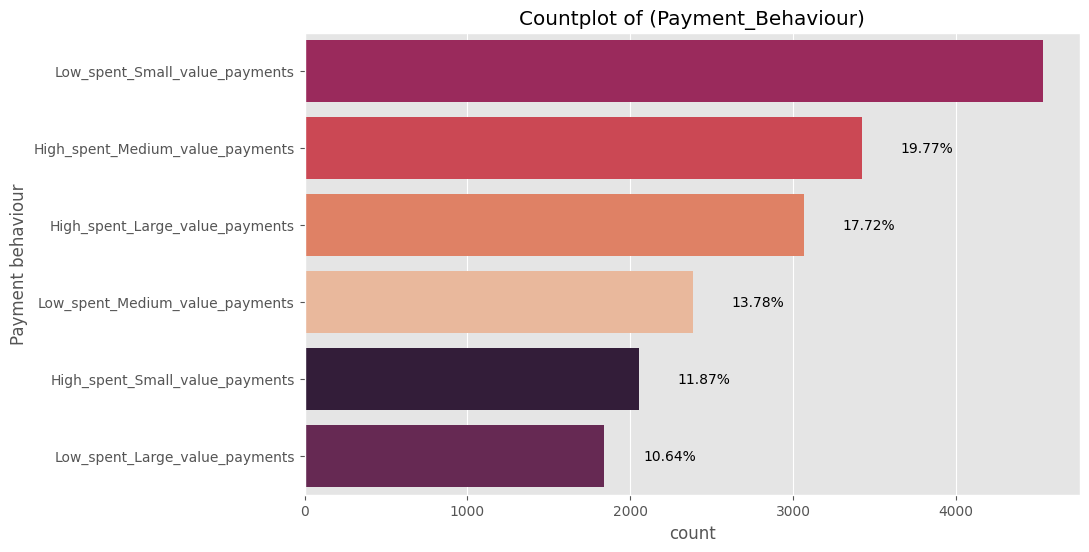

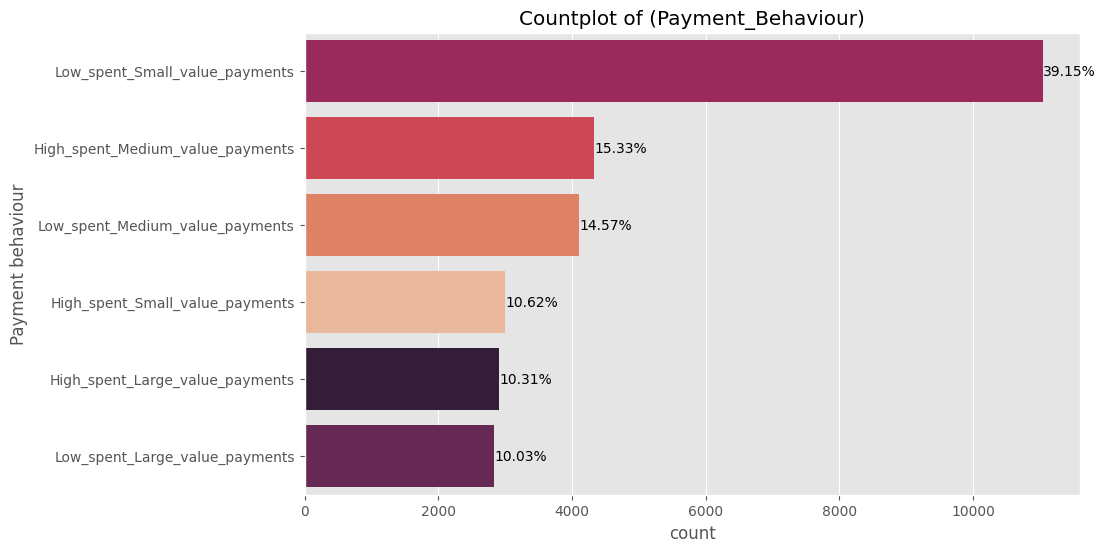

In [35]:
def plot_count_plot(df):
    Payment_Behaviour = df['Payment_Behaviour'].value_counts()
    plt.figure(figsize=(10,6))
    ax = sns.countplot(data=df , y ='Payment_Behaviour' , order= Payment_Behaviour.index , palette='rocket' , hue ='Payment_Behaviour' , legend = False)
    plt.title("Countplot of (Payment_Behaviour)")
    plt.ylabel("Payment behaviour")
    total = len(df)
    for i in range(Payment_Behaviour.shape[0]):
        count = Payment_Behaviour.iloc[i]
        percentage = '{:.2f}%'.format(100 * count / total)
        x = count + 400  # Adjust this value if necessary
        y = i
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.show()

plot_count_plot(df_train)
plot_count_plot(df_good)
plot_count_plot(df_bad)


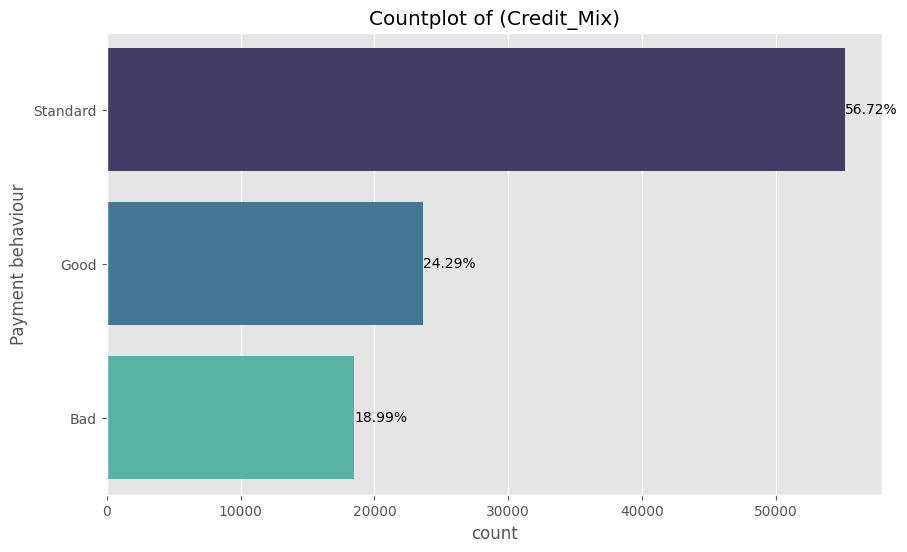

In [36]:
credit_score_values = df_train['Credit_Mix'].value_counts()


plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, y='Credit_Mix', palette='mako', order=credit_score_values.index , hue ='Credit_Mix' , legend = False)
plt.title("Countplot of (Credit_Mix)")
plt.ylabel("Payment behaviour")


total = len(df_train)
for i in range(credit_score_values.shape[0]):
    count = credit_score_values.iloc[i]
    percentage = '{:.2f}%'.format(100 * count / total)
    x = count + 2000  
    y = i 
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()


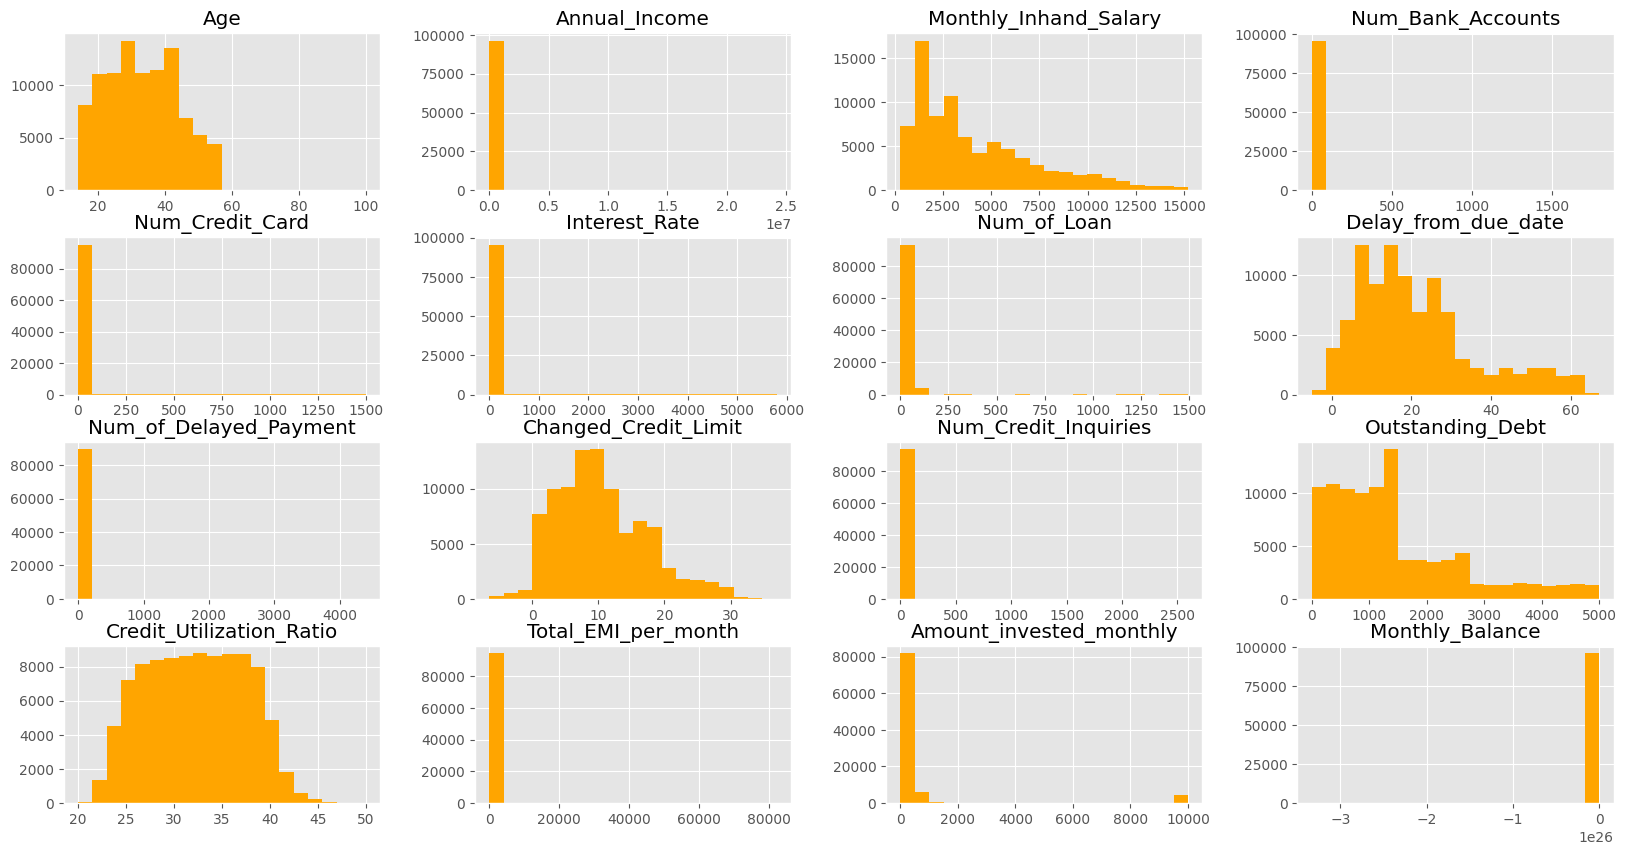

______________________________________________________________________________________________________________________________________________________


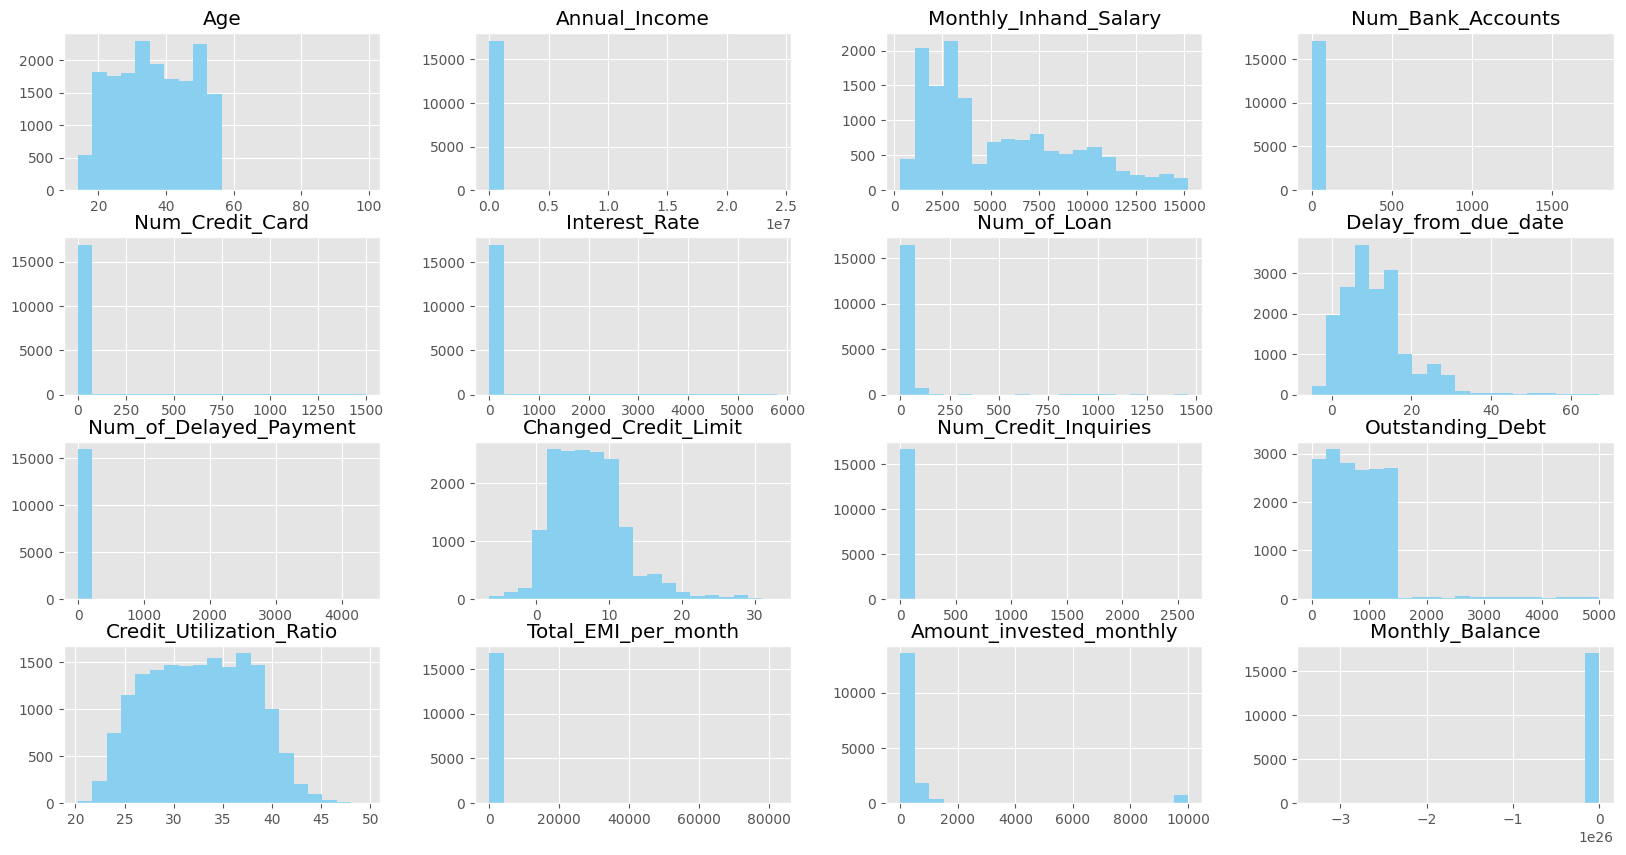

______________________________________________________________________________________________________________________________________________________


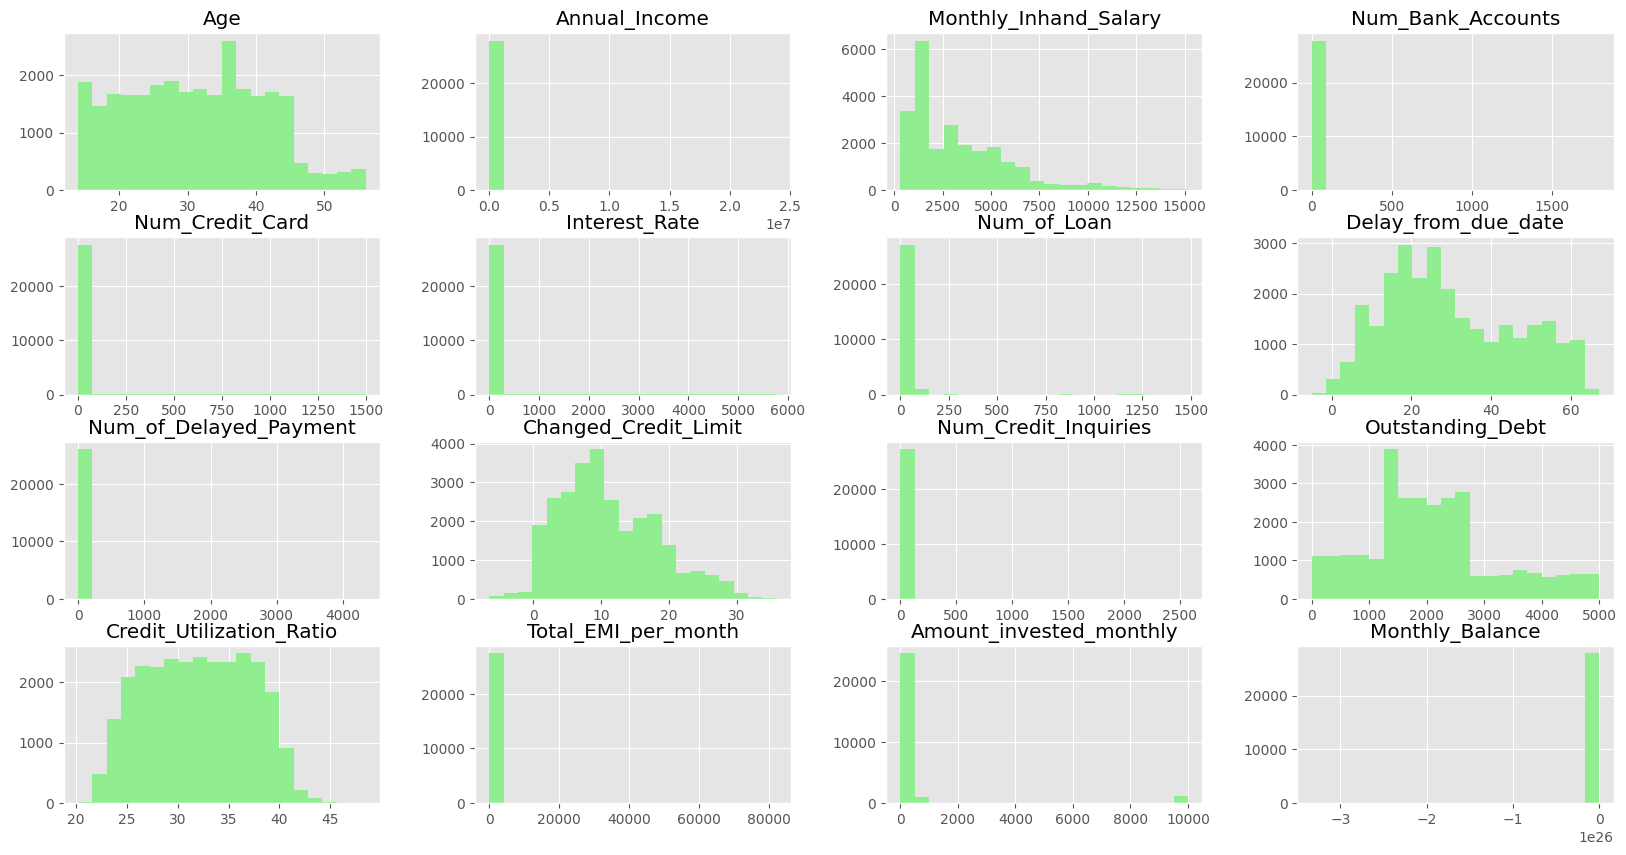

______________________________________________________________________________________________________________________________________________________


In [37]:
def plot_hist(df , color = 'k'):
    df.hist(bins=20 , figsize=(20,10) , color = color)
    plt.show()
    print('_' * 150 )

plot_hist(df_train, '#FFA500') 
plot_hist(df_good, '#89CFF0')   
plot_hist(df_bad, '#90EE90')

In [38]:
df = df_train[df_train['Outstanding_Debt'] <= 1500]

In [39]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    40137
Good        16833
Poor         9423
Name: count, dtype: int64

In [40]:
df = df_train[df_train['Outstanding_Debt'] >= 1500]
df['Credit_Score'].value_counts()

Credit_Score
Poor        18782
Standard    11587
Good          462
Name: count, dtype: int64

* > `It seems that when the outstanding dept increases than 1500 it increases the chance of being the credit score poor`

In [41]:
df = df_train[df_train['Delay_from_due_date'] >= 10]
df['Credit_Score'].value_counts()

Credit_Score
Standard    39893
Poor        25428
Good         8767
Name: count, dtype: int64

In [42]:
df = df_train[df_train['Delay_from_due_date'] < 10]
df['Credit_Score'].value_counts()

Credit_Score
Standard    11831
Good         8528
Poor         2777
Name: count, dtype: int64

* > `It seems also that when the delay from due date increases than 10 it increases the chance of being the credit score poor`

In [43]:
df = df_train[df_train['Monthly_Inhand_Salary'] > 7500]
df['Credit_Score'].value_counts()

Credit_Score
Standard    7196
Good        4030
Poor        1687
Name: count, dtype: int64

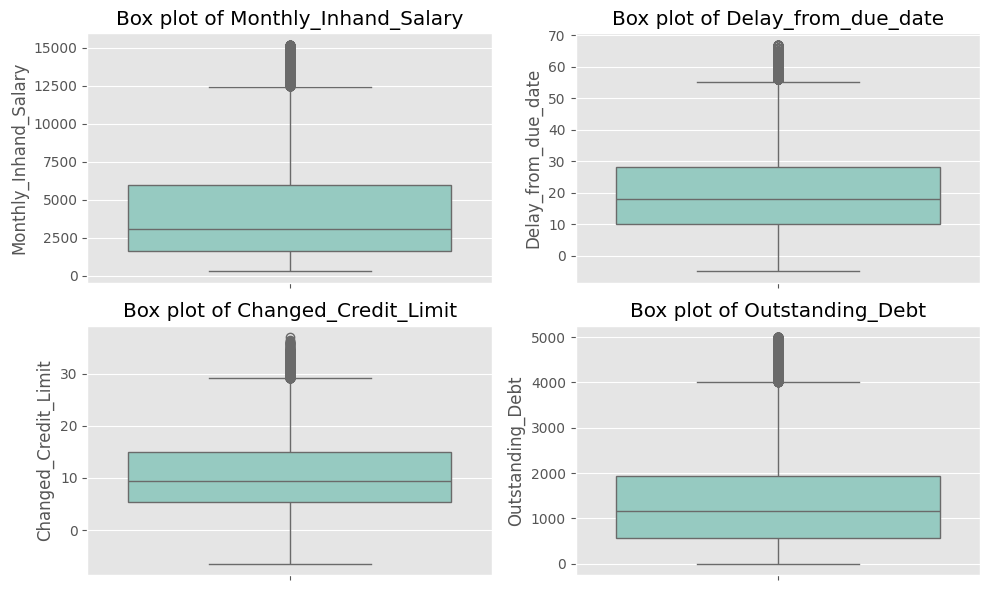

In [44]:
cols = ['Monthly_Inhand_Salary', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio']
sns.set_palette('Set3')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(cols[:4]):
    sns.boxplot(data=df_train, y=col, ax=axes[i] )
    axes[i].set_title(f"Box plot of {col}")

plt.tight_layout()
plt.show()

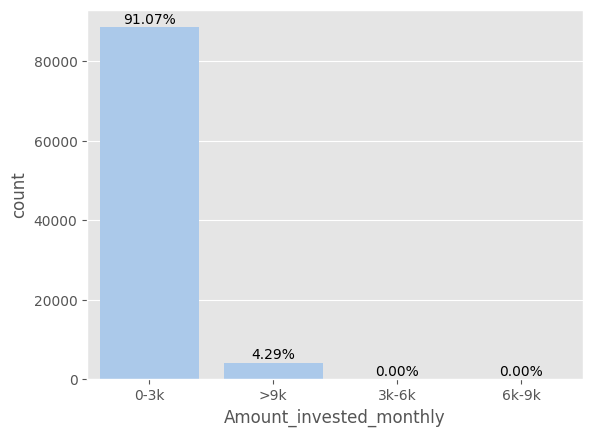

In [45]:
sns.set_palette("pastel")
Amount_invested_monthly = pd.cut(x = df_train['Amount_invested_monthly'],
      bins=[0 , 3000 , 6000 , 9000 , np.inf],
      labels=['0-3k','3k-6k','6k-9k','>9k'])
amount_invested_value = Amount_invested_monthly.value_counts()
ax = sns.countplot(x = Amount_invested_monthly , order = amount_invested_value.index)
for i in range(amount_invested_value.shape[0]):
    count = amount_invested_value.iloc[i]
    strt = "{:0.2f}%".format(100*count/df_train.shape[0])
    ax.annotate(strt , (i , count+2000) , va ='center' , ha='center')
    

* > `The amount of money invested per month seems to range from 0 to 3000 with 91.05%, about 4.3% invested more than 9000 and no one invested between 3000 and 9000 `

In [46]:
df_train[df_train['Amount_invested_monthly'] > 9000]

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
18,March,34.0,Other,143162.64,NaN,1,5,8,3.0,8,...,NaN,Good,1303.01,26.519815,No,246.992319,10000.0,High_spent_Small_value_payments,715.741367,Good
23,August,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,Good,1303.01,38.374753,No,246.992319,10000.0,High_spent_Small_value_payments,895.494583,Standard
28,May,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,1.0,5,...,4.0,Good,632.46,41.154317,No,16.415452,10000.0,Low_spent_Large_value_payments,359.374916,Standard
121,February,30.0,Scientist,31993.78,2942.148333,6,6,7,2.0,12,...,0.0,Standard,818.22,37.958569,Yes,45.141298,10000.0,Low_spent_Small_value_payments,157.869804,Standard
142,July,46.0,Teacher,32284.62,2898.385000,6,7,17,6.0,7,...,10.0,Standard,1283.37,24.205533,Yes,103.037560,10000.0,Low_spent_Small_value_payments,85.902095,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99879,August,27.0,Scientist,118677.54,9963.795000,4,4,6,4.0,3,...,5.0,Good,995.47,39.747228,No,237.106366,10000.0,High_spent_Medium_value_payments,801.752296,Good
99882,March,31.0,Mechanic,16884797.00,5440.945000,7,3,1947,0.0,7,...,2.0,Standard,330.60,38.524095,Yes,0.000000,10000.0,High_spent_Small_value_payments,536.342920,Standard
99919,August,54.0,Media_Manager,20059.98,1523.665000,8,5,12,966.0,25,...,8.0,Good,909.01,32.473773,No,45.076827,10000.0,Low_spent_Small_value_payments,267.184985,Poor
99951,August,33.0,Media_Manager,59146.36,4908.863333,3,6,6,1.0,8,...,5.0,Good,418.03,27.682186,No,26.778419,10000.0,Low_spent_Large_value_payments,389.488483,Standard


### `Bivariate Analysis`

In [47]:
def get_amount_invested_col(col):
    if col >= 0 or col <=3000 :
        return "0-3K"
    elif col > 3000 or col <=6000:
        return "0-6K"
    elif col > 6000 or col <=9000:
        return "0-9K"
    else:
        return ">9K"
df_train['Amount_invested_monthly_categ'] = df_train['Amount_invested_monthly'].apply(get_amount_invested_col)

In [48]:
df_train['Amount_invested_monthly_categ'].value_counts()

Amount_invested_monthly_categ
0-3K    92880
>9K      4344
Name: count, dtype: int64

In [49]:
pd.DataFrame(df_train.groupby(['Amount_invested_monthly_categ'])[['Credit_Score']].value_counts())

count
Amount_invested_monthly_categ Credit_Score       
0-3K                          Standard      49465
                              Poor          26911
                              Good          16504
>9K                           Standard       2259
                              Poor           1294
                              Good            791

In [50]:
df_train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Amount_invested_monthly_categ'],
      dtype='object')

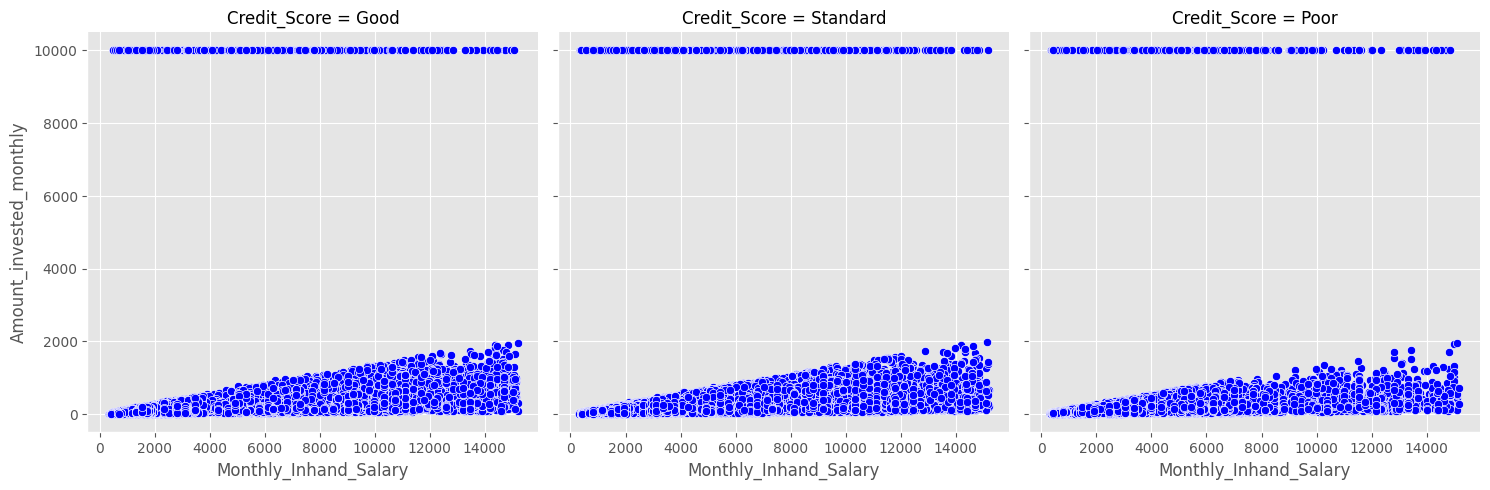

In [51]:
sns.relplot(x='Monthly_Inhand_Salary', y='Amount_invested_monthly', data=df_train, kind='scatter', 
            col='Credit_Score', col_wrap=3 , color ='blue')
plt.show()

* > `comment : The increase in monthly salary seems to increase the amount of money invested per month There are also people who invest $10k per month which be considered outliers`

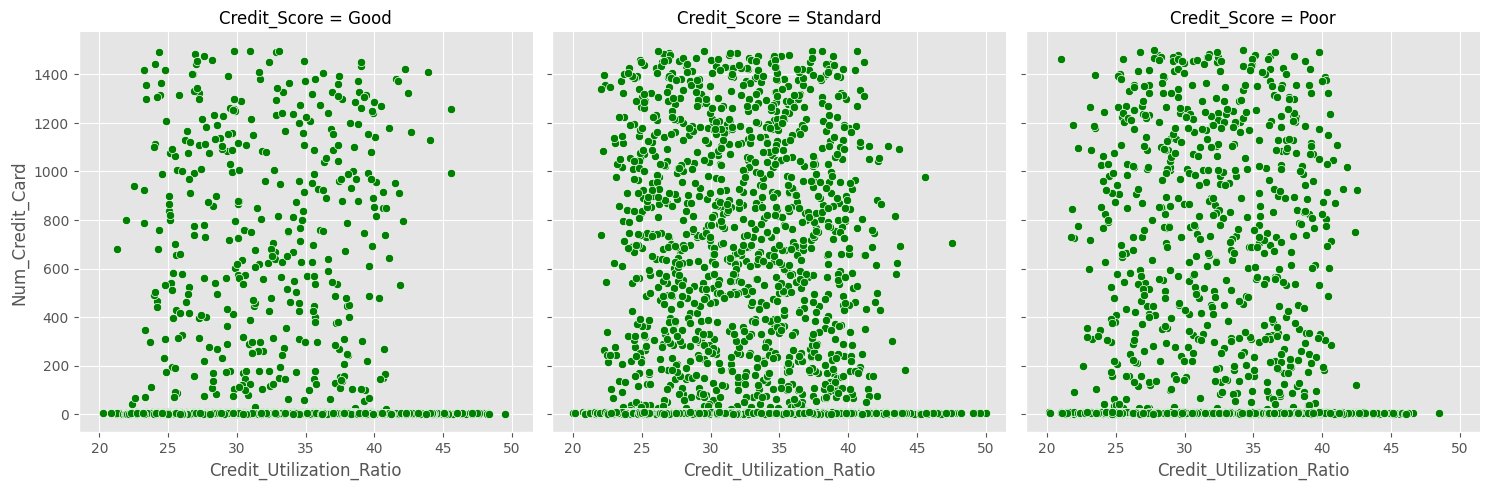

In [52]:
sns.relplot(x='Credit_Utilization_Ratio', y='Num_Credit_Card', data=df_train, kind='scatter', 
            col='Credit_Score', col_wrap=3 , color ='g')
plt.show()

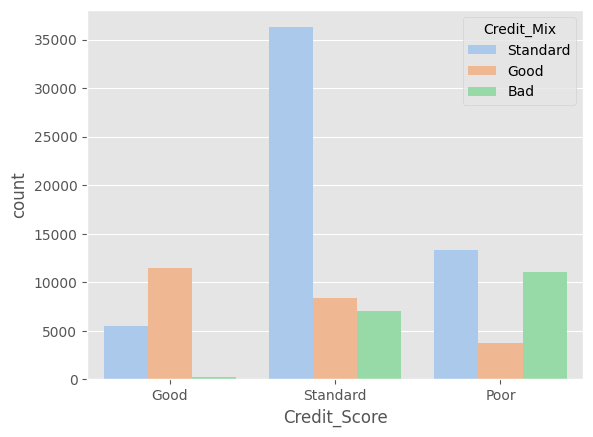

In [53]:
sns.set_palette("pastel")
sns.countplot(data = df_train , x ='Credit_Score' , hue ='Credit_Mix' )
plt.show()

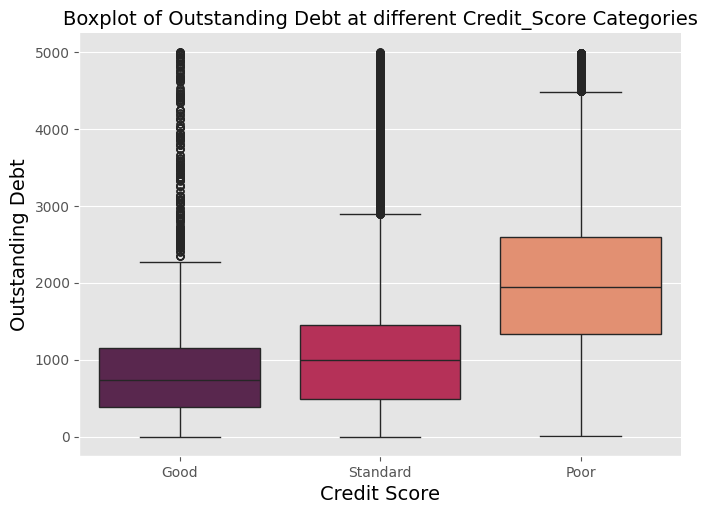

In [54]:
sns.catplot(y='Outstanding_Debt', x='Credit_Score', data=df_train, kind='box', height=5, aspect=1.4,palette='rocket' , hue ='Credit_Score')
plt.title('Boxplot of Outstanding Debt at different Credit_Score Categories', fontsize=14, c='k')
plt.xlabel('Credit Score', fontsize=14, c='k')
plt.ylabel('Outstanding Debt', fontsize=14, c='k')
plt.show()

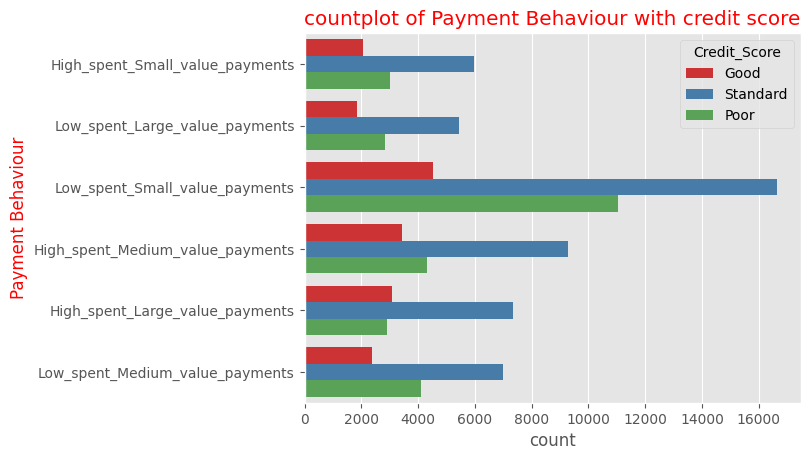

In [55]:
sns.countplot(data = df_train , y = 'Payment_Behaviour' , hue ='Credit_Score' , palette='Set1')
plt.title("countplot of Payment Behaviour with credit score" , c = "r")
plt.ylabel('Payment Behaviour' , c ="r")
plt.show()

In [56]:
df_train.groupby('Month')['Amount_invested_monthly'].sum()

Month
April       7.344167e+06
August      7.409425e+06
February    7.146557e+06
January     7.434491e+06
July        7.316463e+06
June        7.424772e+06
March       7.570457e+06
May         7.459028e+06
Name: Amount_invested_monthly, dtype: float64

In [57]:
df_train.drop(['Month','Amount_invested_monthly_categ'], axis = 1 , inplace = True)
df_test.drop(['Month'], axis = 1 , inplace = True)

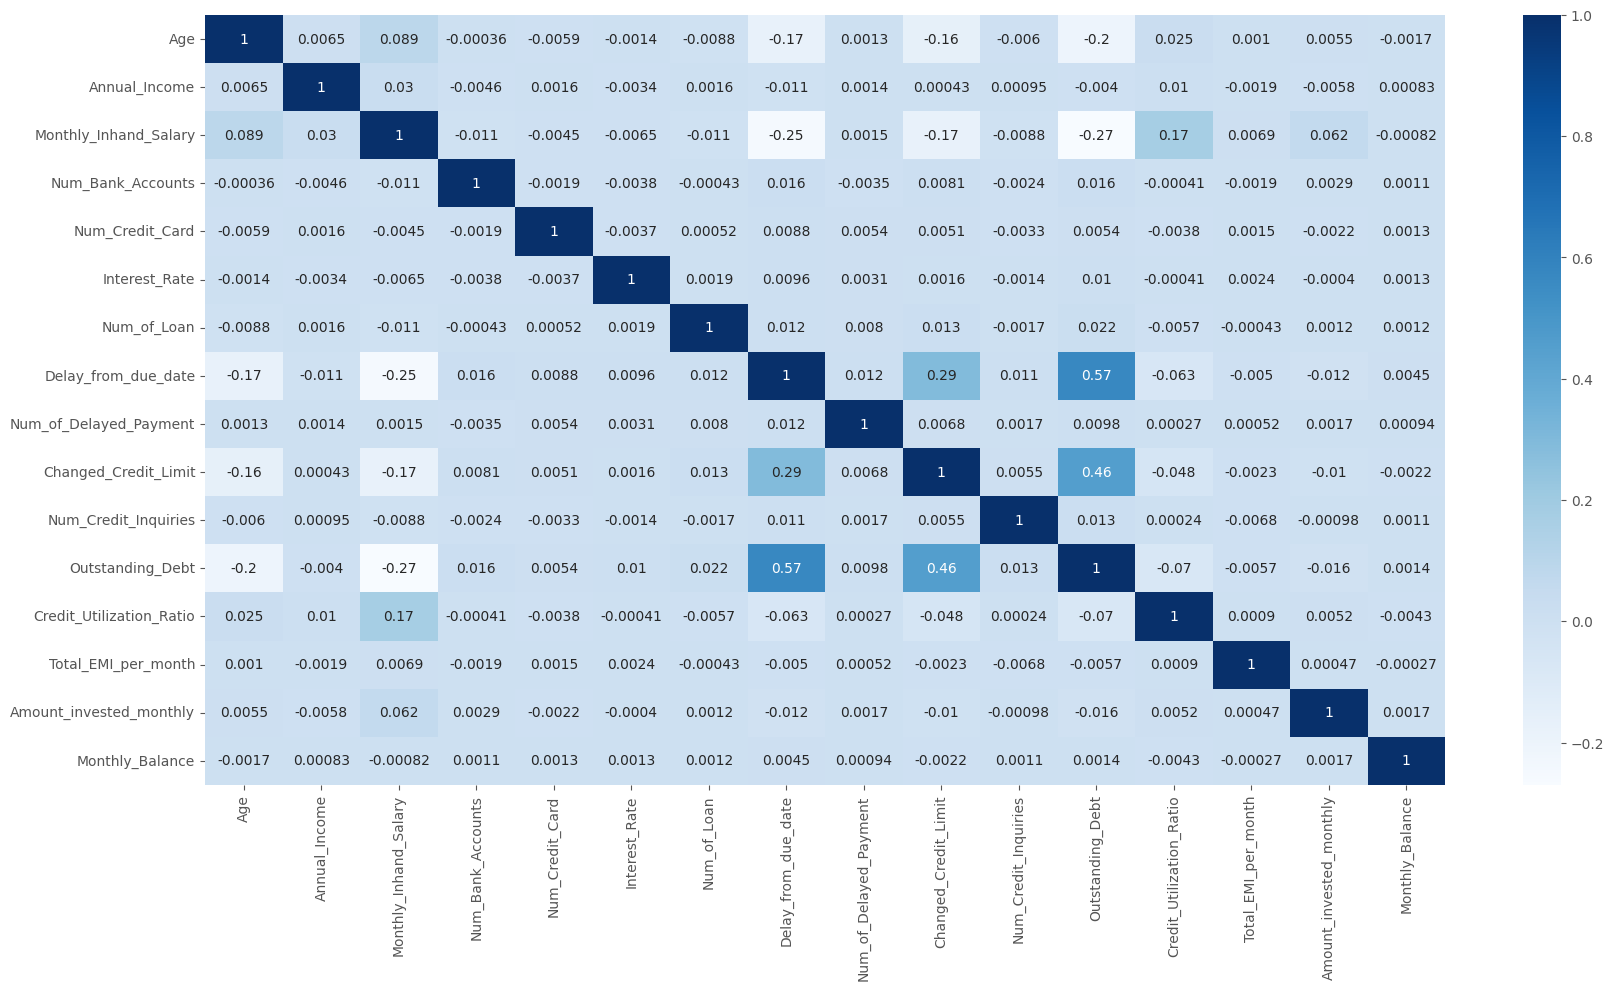

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.select_dtypes(include=['int64','float64']).corr(),annot=True , cmap ="Blues")
plt.show()

## `Dealing with categorical features`

In [59]:
df_train.select_dtypes(include = ['object'])

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,Standard,No,High_spent_Small_value_payments,Good
1,Scientist,Good,No,Low_spent_Large_value_payments,Good
3,Scientist,Good,No,Low_spent_Small_value_payments,Good
4,Scientist,Good,No,High_spent_Medium_value_payments,Good
5,Scientist,Good,No,Low_spent_Small_value_payments,Good
...,...,...,...,...,...
99995,Mechanic,Standard,No,High_spent_Large_value_payments,Poor
99996,Mechanic,Standard,No,High_spent_Medium_value_payments,Poor
99997,Mechanic,Good,No,High_spent_Large_value_payments,Poor
99998,Mechanic,Good,No,Low_spent_Large_value_payments,Standard


In [60]:
lbl = LabelEncoder()
ordinal = OrdinalEncoder()


label_cols = ['Occupation', 'Payment_of_Min_Amount']
for col in label_cols:
    df_train[col] = lbl.fit_transform(df_train[col])
    df_test[col] = lbl.transform(df_test[col])  

In [61]:
ordinal_cols = ['Credit_Mix', 'Payment_Behaviour']

ordinal.fit(df_train[ordinal_cols])
df_train[ordinal_cols] = ordinal.transform(df_train[ordinal_cols])
df_test[ordinal_cols] = ordinal.transform(df_test[ordinal_cols])

In [62]:
df_train["Credit_Score"] = ordinal.fit_transform(df_train[["Credit_Score"]])
df_train

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,13,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,4.0,2.0,809.98,26.822620,0,49.574949,80.415295,2.0,312.494089,0.0
1,23.0,13,19114.12,NaN,3,4,3,4.0,-1,NaN,...,4.0,1.0,809.98,31.944960,0,49.574949,118.280222,3.0,284.629162,0.0
3,23.0,13,19114.12,NaN,3,4,3,4.0,5,4.0,...,4.0,1.0,809.98,31.377862,0,49.574949,199.458074,5.0,223.451310,0.0
4,23.0,13,19114.12,1824.843333,3,4,3,4.0,6,NaN,...,4.0,1.0,809.98,24.797347,0,49.574949,41.420153,1.0,341.489231,0.0
5,23.0,13,19114.12,NaN,3,4,3,4.0,8,4.0,...,4.0,1.0,809.98,27.262259,0,49.574949,62.430172,5.0,340.479212,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,9,39628.99,3359.415833,4,6,7,2.0,23,7.0,...,3.0,2.0,502.38,34.663572,0,35.104023,60.971333,0.0,479.866228,1.0
99996,25.0,9,39628.99,3359.415833,4,6,7,2.0,18,7.0,...,3.0,2.0,502.38,40.565631,0,35.104023,54.185950,1.0,496.651610,1.0
99997,25.0,9,39628.99,3359.415833,4,6,5729,2.0,27,6.0,...,3.0,1.0,502.38,41.255522,0,35.104023,24.028477,0.0,516.809083,1.0
99998,25.0,9,39628.99,3359.415833,4,6,7,2.0,20,NaN,...,3.0,1.0,502.38,33.638208,0,35.104023,251.672582,3.0,319.164979,2.0


## `Dealing with nulls `

Monthly_Inhand_Salary      14597
Num_of_Delayed_Payment      6824
Changed_Credit_Limit        2037
Num_Credit_Inquiries        1906
Amount_invested_monthly     4344
Monthly_Balance             1179
dtype: int64


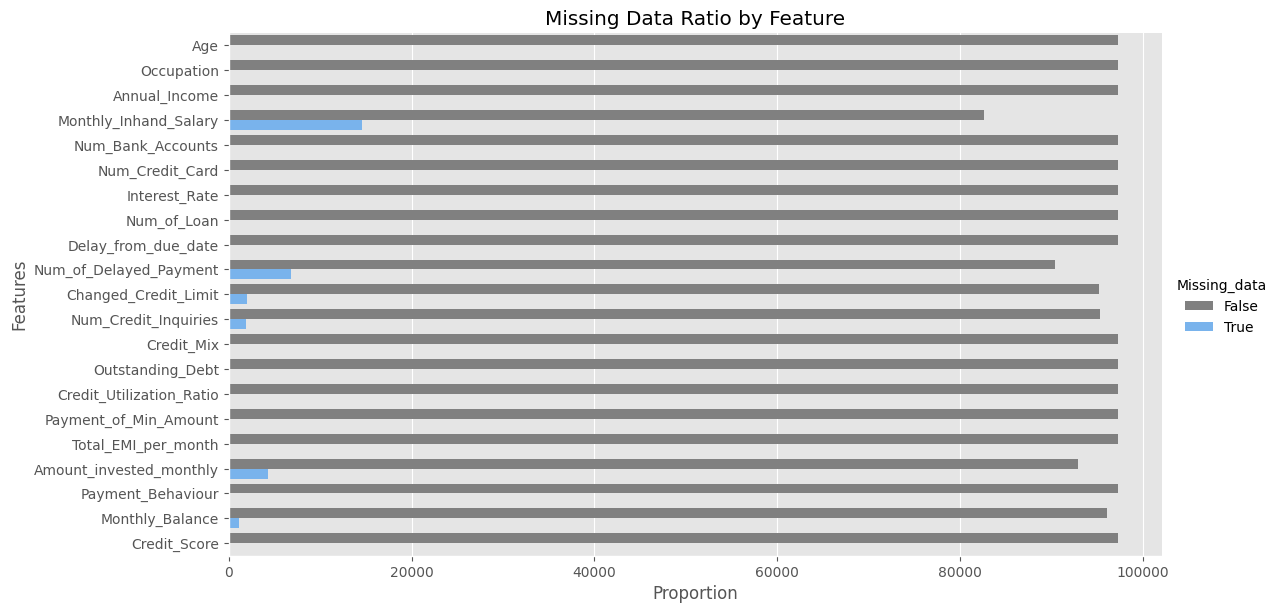

In [63]:
def null_ratio_plot(df):
    
    df_melted = df.isna().melt(value_name='Missing_data', var_name='Features')
    

    sns.catplot(
        data=df_melted,
        y='Features',
        hue='Missing_data',
        kind='count',
        height=6,
        aspect=2,
        palette=['#808080', '#66b3ff']
    )
    
    plt.title('Missing Data Ratio by Feature')
    plt.xlabel('Proportion')
    plt.ylabel('Features')
    plt.show()

# Assuming df_train is your training DataFrame
print(df_train.isna().sum()[df_train.isna().sum() > 0])
null_ratio_plot(df_train)

In [64]:
for i in [50, 60, 70, 5000, 30000]:
    print(f'for i == {i}')
    print(f'The Annual income is {df_train["Annual_Income"][i] / 12}')
    print(f'The Monthly inhand salary is {df_train["Monthly_Inhand_Salary"][i]}')

for i == 50
The Annual income is 10942.783333333333
The Monthly inhand salary is 10469.207759388815
for i == 60
The Annual income is 2840.115
The Monthly inhand salary is 2611.115
for i == 70
The Annual income is 9569.8675
The Monthly inhand salary is 9843.8675
for i == 5000
The Annual income is 2440.1616666666664
The Monthly inhand salary is 2588.1616666666664
for i == 30000
The Annual income is 1532.7924999999998
The Monthly inhand salary is 1742.7924999999998


* > `It seems that the column of Monthly inhand salary is approximatly the 1/12 the value of The Annual income so we fill null values of Monthly inhand salary with this value `

In [65]:
def fill_monthly_inhand_salary(row):
    if np.isnan(row['Monthly_Inhand_Salary']):
        return row['Annual_Income'] / 12
    else:
        return row['Monthly_Inhand_Salary']

df_train['Monthly_Inhand_Salary'] = df_train.apply(fill_monthly_inhand_salary, axis=1)
df_test['Monthly_Inhand_Salary'] = df_test.apply(fill_monthly_inhand_salary, axis=1)

In [66]:
for col in df_train[['Num_of_Delayed_Payment','Changed_Credit_Limit'
,'Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']]:
    col_median = df_train[col].median()
    df_train.fillna({col: col_median}, inplace=True)
    df_test.fillna({col: col_median}, inplace=True)

In [67]:
print(df_train.isna().sum()[df_train.isna().sum() > 0])

Series([], dtype: int64)


## `Handel with outliers`

In [881]:
outlieres_indicies = detect_outliers(df_train ,0, df_train.columns)
len(outlieres_indicies)

38665

In [882]:
df_train.drop(outlieres_indicies , inplace = True)

In [883]:
for col in df_train.columns :
    outlieres_indicies = detect_outliers(df_train, 0 , [col])
    col_median = df_train[col].median()
    df_train.loc[outlieres_indicies,col] = col_median

### `Split the dataset and handel imblanced classes`

In [70]:
x = df_train.drop('Credit_Score' , axis = 1)
y = df_train['Credit_Score']
smote = SMOTE()
x,y = smote.fit_resample(x,y)
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.1 , shuffle= True , random_state=24 , stratify=y)
print('x_train shape -- ', x_train.shape)
print('y_train shape -- ', y_train.shape)
print('x_test shape -- ', x_test.shape)
print('y_test shape -- ', y_test.shape)

x_train shape --  (139654, 20)
y_train shape --  (139654,)
x_test shape --  (15518, 20)
y_test shape --  (15518,)


## `Pipline for features to handle null values and do standard scaler`

In [71]:
pip = Pipeline([
    ('scaler' , StandardScaler())
])
x_train_final = pip.fit_transform(x_train)
x_test_final = pip.transform(x_test)

print('x_train shape -- ', x_train_final.shape)
print('y_train shape -- ', y_train.shape)
print('x_test shape -- ', x_test_final.shape)
print('y_test shape -- ', y_test.shape)
y_train.value_counts()

x_train shape --  (139654, 20)
y_train shape --  (139654,)
x_test shape --  (15518, 20)
y_test shape --  (15518,)


Credit_Score
0.0    46552
1.0    46551
2.0    46551
Name: count, dtype: int64

## `Building ML Models` 

In [886]:
models = {
    'ovo' : OneVsOneClassifier(estimator=RandomForestClassifier()),
    'SGD': SGDClassifier(),
    'Lgr': LogisticRegression(),
    'xgb': xgb.XGBClassifier(),
    'dt' : DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'bag': BaggingClassifier(),
    #'gdb': GradientBoostingClassifier(),
    #'SVC' : SVC(),          
          }

For ovo Model : 
__________________________________________________________________________________________
Train Score is 1.0
Test Score is 0.8722692589108394
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      3189
         1.0       0.88      0.89      0.89      3189
         2.0       0.85      0.79      0.82      3189

    accuracy                           0.87      9567
   macro avg       0.87      0.87      0.87      9567
weighted avg       0.87      0.87      0.87      9567



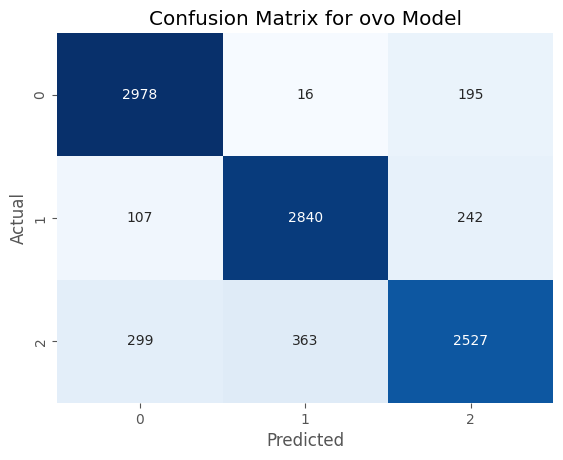

For SGD Model : 
__________________________________________________________________________________________
Train Score is 0.7116144018583043
Test Score is 0.7181979721960907
              precision    recall  f1-score   support

         0.0       0.69      0.88      0.77      3189
         1.0       0.74      0.73      0.74      3189
         2.0       0.74      0.54      0.63      3189

    accuracy                           0.72      9567
   macro avg       0.72      0.72      0.71      9567
weighted avg       0.72      0.72      0.71      9567



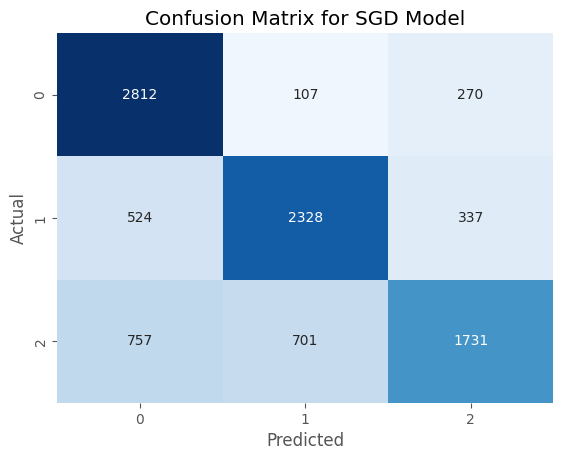

For Lgr Model : 
__________________________________________________________________________________________
Train Score is 0.7148199767711962
Test Score is 0.7225880631336887
              precision    recall  f1-score   support

         0.0       0.70      0.86      0.77      3189
         1.0       0.78      0.70      0.74      3189
         2.0       0.69      0.61      0.65      3189

    accuracy                           0.72      9567
   macro avg       0.72      0.72      0.72      9567
weighted avg       0.72      0.72      0.72      9567



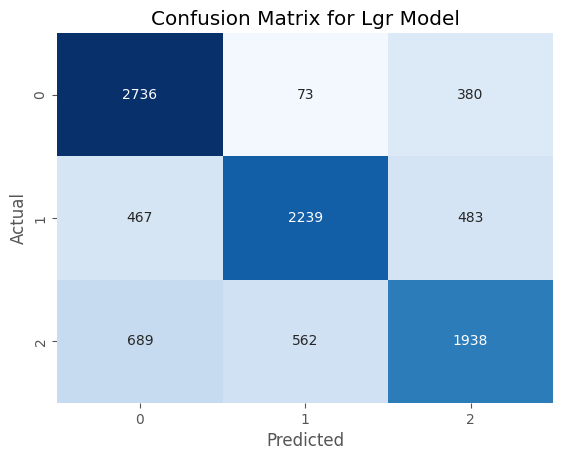

For xgb Model : 
__________________________________________________________________________________________
Train Score is 0.8794308943089431
Test Score is 0.8453015574370231
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      3189
         1.0       0.87      0.83      0.85      3189
         2.0       0.81      0.80      0.80      3189

    accuracy                           0.85      9567
   macro avg       0.85      0.85      0.84      9567
weighted avg       0.85      0.85      0.84      9567



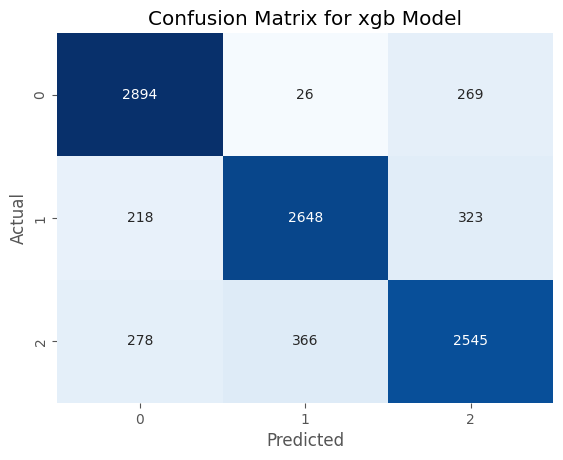

For dt Model : 
__________________________________________________________________________________________
Train Score is 1.0
Test Score is 0.7830040765130135
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      3189
         1.0       0.79      0.79      0.79      3189
         2.0       0.73      0.72      0.73      3189

    accuracy                           0.78      9567
   macro avg       0.78      0.78      0.78      9567
weighted avg       0.78      0.78      0.78      9567



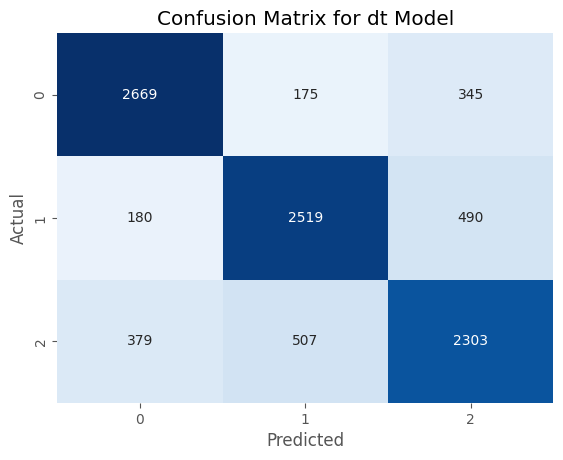

For RF Model : 
__________________________________________________________________________________________
Train Score is 1.0
Test Score is 0.8677746419985366
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      3189
         1.0       0.88      0.88      0.88      3189
         2.0       0.85      0.79      0.82      3189

    accuracy                           0.87      9567
   macro avg       0.87      0.87      0.87      9567
weighted avg       0.87      0.87      0.87      9567



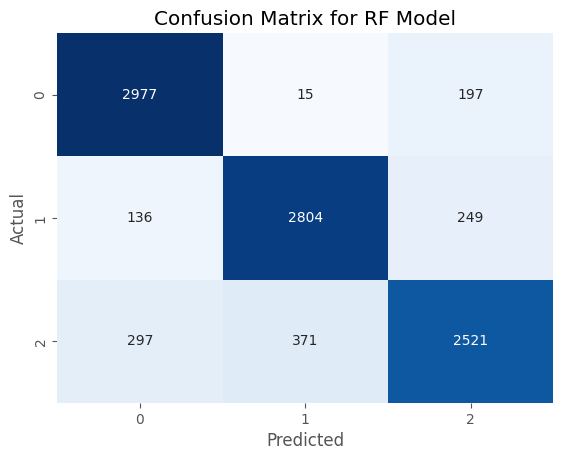

For bag Model : 
__________________________________________________________________________________________
Train Score is 0.9888617886178862
Test Score is 0.8415386223476534
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      3189
         1.0       0.86      0.85      0.85      3189
         2.0       0.83      0.76      0.79      3189

    accuracy                           0.84      9567
   macro avg       0.84      0.84      0.84      9567
weighted avg       0.84      0.84      0.84      9567



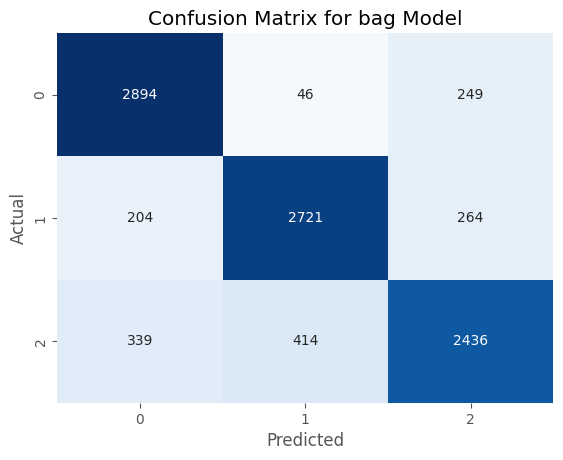

In [887]:
for key, model in models.items():
    print(f'For {key} Model : ')
    print('_' * 90)
    model.fit(x_train_final, y_train)
    y_pred = model.predict(x_test_final)
    train_accuracy = accuracy_score(y_train, model.predict(x_train_final))
    test_accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Train Score is {train_accuracy}")
    print(f"Test Score is {test_accuracy}")
    
    print(classification_report(y_test, y_pred))
    
    confusion_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.title(f'Confusion Matrix for {key} Model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### `it seems that the best model between these models is xgboost , Other models cause overfitting `

### `ANN Model`

In [72]:
input_shape = x_train_final.shape[1]

In [74]:
model = Sequential()

model.add(Dense(512, input_shape=(input_shape,), activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))


model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=100, restore_best_weights=True)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 512)                 │          10,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 216,451 (845.51 KB)

 Trainable params: 216,451 (845.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x= x_train_final, y= y_train, validation_data= (x_test_final, y_test), validation_split= 0.1, batch_size= 512, epochs=1000, verbose=1, 
          callbacks=[early_stopping])

Epoch 1/1000
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6585 - loss: 0.8060 - val_accuracy: 0.7538 - val_loss: 0.6623
Epoch 2/1000
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7397 - loss: 0.6761 - val_accuracy: 0.7624 - val_loss: 0.6338
Epoch 3/1000
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7488 - loss: 0.6538 - val_accuracy: 0.7621 - val_loss: 0.6185
Epoch 4/1000
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7513 - loss: 0.6463 - val_accuracy: 0.7655 - val_loss: 0.6100
Epoch 5/1000
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7535 - loss: 0.6385 - val_accuracy: 0.7693 - val_loss: 0.6043
Epoch 6/1000
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7549 - loss: 0.6328 - val_accuracy: 0.7694 - val_loss: 0.6004
Epoch 7/1000
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7589 - loss: 0.6212 - val_accuracy: 0.7716 - val_loss: 0.5987
Epoch 8/1000
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7603 - loss: 0

In [918]:
model.evaluate(x_test_final, y_test)

299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.8682 - loss: 0.3722


[0.3638739287853241, 0.8745688199996948]

In [919]:
model.evaluate(x_train_final, y_train)

2691/2691 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - accuracy: 0.9431 - loss: 0.1750


[0.17441938817501068, 0.9431591033935547]

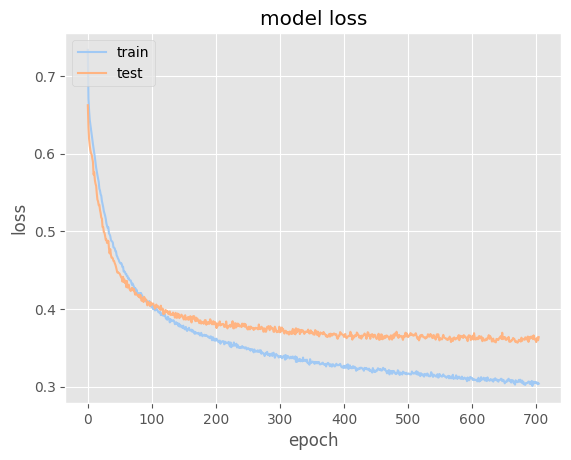

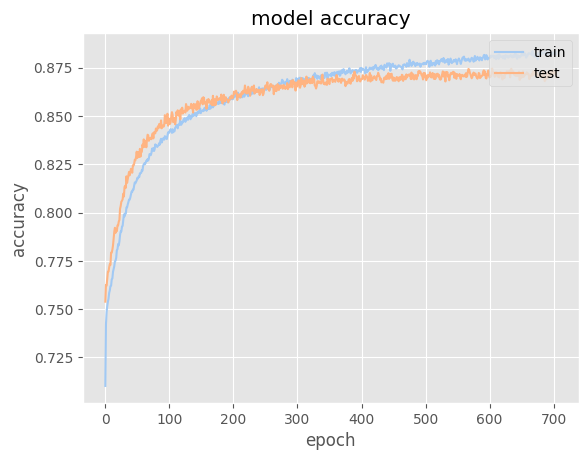

In [920]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### `Saving model`

In [898]:
import joblib
model.save('model.keras')
joblib.dump(pip , "pip.h5")

### `Testing model`

In [901]:
df_transformed_test = pip.transform(df_test)
predictions = model.predict(df_transformed_test)
predicted_classes = np.argmax(predictions, axis=1)

In [904]:
df_test['Credit_score'] = predicted_classes

In [906]:
df_test

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_score
0,23.0,13,19114.12,1824.843333,3,4,3,4.0,3,7.0,...,2022.0,1.0,809.98,35.030402,0,49.574949,236.642682,5.0,186.266702,2
1,24.0,13,19114.12,1824.843333,3,4,3,4.0,3,9.0,...,4.0,1.0,809.98,33.053114,0,49.574949,21.465380,1.0,361.444004,0
2,24.0,13,19114.12,1824.843333,3,4,3,4.0,-1,4.0,...,4.0,1.0,809.98,33.811894,0,49.574949,148.233938,4.0,264.675446,0
3,24.0,13,19114.12,1592.843333,3,4,3,4.0,4,5.0,...,4.0,1.0,809.98,32.430559,0,49.574949,39.082511,1.0,343.826873,0
4,28.0,12,34847.84,3037.986667,2,4,6,1.0,3,1.0,...,5.0,1.0,605.03,25.926822,0,18.816215,39.684018,0.0,485.298434,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4975.0,1,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,12.0,2.0,3571.70,34.780553,1,60.964772,146.486325,5.0,275.539570,0
49996,25.0,9,39628.99,3302.415833,4,6,7,2.0,20,14.0,...,7.0,1.0,502.38,27.758522,0,35.104023,181.442999,5.0,409.394562,2
49997,25.0,9,39628.99,3359.415833,4,6,7,2.0,23,5.0,...,7.0,1.0,502.38,36.858542,0,35.104023,10000.000000,3.0,349.726332,1
49998,25.0,9,39628.99,3302.415833,4,6,7,2.0,21,6.0,...,7.0,1.0,502.38,39.139840,0,35.104023,97.598580,2.0,463.238981,1


In [907]:
label_mapping = {0: 'Good', 1: 'Poor', 2: 'Standard'}

In [908]:
df_test['Credit_score'] = df_test['Credit_score'].map(label_mapping)

In [909]:
df_test['Credit_score'].value_counts()

Credit_score
Standard    24173
Poor        17932
Good         7895
Name: count, dtype: int64

In [910]:
df = df_test[df_test['Outstanding_Debt'] >= 1500]
df['Credit_score'].value_counts()

Credit_score
Poor        10642
Standard     4699
Good          515
Name: count, dtype: int64

In [911]:
df = df_test[df_test['Delay_from_due_date'] >= 10]
df['Credit_score'].value_counts()

Credit_score
Standard    18164
Poor        15672
Good         4228
Name: count, dtype: int64

# `Business value` 

## `As expected, people with outstanding debts of more than 1500 and if their payment history is more than 10 days late from the payment day , both can increase the chance of having a poor credit score`